In [1]:
import numpy as np
import matplotlib as mpl
from numpy import linalg as alg
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import random
import tensorflow as tf

# Matrix Algebra

In [2]:
M       = np.array
MO      = np.zeros
t       = np.transpose
I       = np.identity
reshape = np.reshape
o       = np.multiply
x       = np.dot
pow     = alg.matrix_power
inv     = alg.inv
det     = alg.det

rows    = lambda M : np.size(M, 0)
cols    = lambda M : np.size(M, 1)

In [3]:
def matrixRound(M, factor = 0):
    r = rows(M)
    c = cols(M)
    M = M.flatten()
    for i in range(0, len(M)):
        M[i] = round(M[i],factor)
    M = reshape(M,(r,c))
    return M

#to do def simplificate Matrix


In [4]:
def randomM(d1,d2, factor = 10, doRound = True, roundFactor = 0):
    M = np.random.rand(d1,d2)
    M = M * factor
    if(doRound):
        M = matrixRound(M,roundFactor)
    return M

In [5]:
def gauss(M):
    Mprime = M.copy()
    c = cols(M)-1
    for i in range(0, c):
        for j in range(0, c-i):
            Mprime[c-j,:] = Mprime[c-j-1,i]*Mprime[c-j,:] - Mprime[c-j,i]*Mprime[c-j-1,:] 
    return Mprime

In [6]:
def r(M):
    A = M.copy()
    A = gauss(A)
    if(cols(A)>rows(A)):
        ran = rows(A)
    else:
        ran = cols(A)
    c = ran
    
    for i in range(0, c):
        n = 0
        
        for j in range(0, c):
            if(A[i,j] == 0):
                n = n+1
                
            if(n == c):
                ran = ran -1
    return ran 
            

In [7]:
def Cramer(M,b, log = True):
    X = np.zeros(cols(M))
    detM = det(M)
    unknow = ['x','y','z','t']
    
    for i in range(0, len(X)):
        Mx = M.copy()
        Mx[:,i] = t(b)
        detMx = det(Mx)
        X[i] = detMx/detM
        
        if(log):
            if(len(X) <= len(unknow)):
                print(unknow[i], ' = ', X[i])
            else:
                print('x[',i,'] = ', X[i])
    return X

In [8]:
def solve(M, b = 0, cramer = True, log = True):
    E = 'E: wrong dimensions: vector B must have number of terms equal to rows number of A.'
    if(type(b) == int):
        b = np.zeros((rows(M)))   
    if(cramer):
        if(len(b) == rows(M)):
            print('solved')
            return Cramer(M, b, log)
        elif(len(t(b)) == rows(M)):
            print('solved with transposed b')
            return Cramer(M, t(b), log)
        else:
            print(E)
            
    else:
        if(len(b) == rows(M)):
            print('solved with numpy')
            return alg.solve(M, b)
        elif(len(t(b)) == rows(M)):
            print('solved with numpy and transposed b')
            return alg.solve(M, t(b))
        else:
            print(E)
    

# Geometry

In [9]:
#mpl.rcParams['legend.fontsize'] = 15

#fig = plt.figure()
#ax = fig.gca(projection='3d')
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**3 + 5
#x = r * np.sin(theta)
#y = r * np.cos(theta)
#ax.plot(x, y, z, label='parametric curve')
#ax.legend()

#plt.show()

In [10]:
#def pointsCoordinatesTOmatrix(points):
#    if(type(points) == list):
#        metaP = MO(#defined based on points)
#        for i in range(0, #metaP rows):
#            for j in range(0,#metaPcols)
#                metaP[i,j] = #respective points.coordinates
#        return metaP
#    else:
#        print('to do')
        

def pointsTOmatrix(points, log = False, dimension = '2D'):
    def dimensionChange(points):
        if(dimension == '2D'):
            if(log):
                print('')
                print('converted to points matrix: ')
                print(' -coordinates: ')
            it = points.dimensions/2
            if(str(it-int(it))[1:] == '.0'):
                it = int(it)
            if(type(it) == int):
                metaP = []
                d = 0
                for i in range(0, it):
                    metaP.append(P([points.coordinates[d], points.coordinates[d+1]]))
                    if(log):
                        print('    ', metaP[i].coordinates)
                    d += 2
                if(log):
                    print(' -objects array: ')
                    print(metaP)
                    print('-------')
            return metaP
        
    meta = dimensionChange(points)
    p = MO((len(meta), meta[0].dimensions))
    for i in range(0, len(meta)):
        p[i,:] = meta[i].coordinates
        
    return p

def drawPoints(points, mode = '2D', log = False):
    
    def draw2DPoints(points):
        p = pointsTOmatrix(points, log)
        for i in range(0, len(p)):
            x = p[i,0]
            y = p[i,1]
            plt.scatter(x, y, s=20)

    def draw3DPoints(points):
        p = pointsTOmatrix(points)
        fig = plt.figure()
        ax = Axes3D(fig)

        x = list(p[:,0])
        y = list(p[:,1])
        z = list(p[:,2])

        ax.scatter(x,y,z)
        plt.show()
    
    if(mode == '2D'):
        draw2DPoints(points)
    else:
        draw3DPoints(points)
        
class P:

    def __init__(self, coordinates, log = False):
        self.coordinates = coordinates
        self.dimensions = int(len(coordinates))

        if(log):
            self.infoDisplay()
            self.draw(log)
            
    def infoDisplay(self):
        print('object: ', P)
        print('P',self.coordinates)
        print('dimensions = ',self.dimensions)
        
    def draw(self, log = False, multidimensionalRepresentation = '2D'):
        
        if (self.dimensions < 4):
            metaP = P(self.coordinates)
            if(self.dimensions == 3):
                drawPoints(metaP, '3D')
            elif(self.dimensions == 2):
                drawPoints(metaP)
                
        elif(multidimensionalRepresentation == '2D'):
            metaP = P(self.coordinates)
            drawPoints(metaP, log = log)


In [11]:
#class v:
#    def __init__(self, a = P([0,0]), b = ([0,0])):
        #Based on 2 coordinate points or on a straight or on a surface.
         

object:  <class '__main__.P'>
P [2, 2, 7, 5, 8, 6]
dimensions =  6

converted to points matrix: 
 -coordinates: 
     [2, 2]
     [7, 5]
     [8, 6]
 -objects array: 
[<__main__.P object at 0x000001E9E6C97C50>, <__main__.P object at 0x000001E9E6C975F8>, <__main__.P object at 0x000001E9E6C97470>]
-------
2
[2, 2, 7, 5, 8, 6]


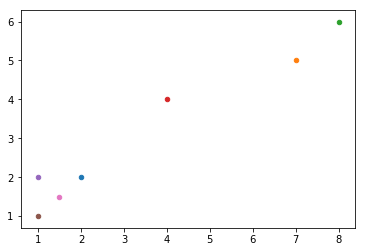

In [12]:
c = P([2,2,7,5,8,6], True)
c2 = P([4,4,1,2,1,1])
a = P([1.5,1.5])
b= P([0,4])
drawPoints(c2)
a.draw()
print(a.dimensions)
print(c.coordinates)

In [13]:
b = P([1,2,3,4,5,6])
c = P([2,3,4,5,6,7])
d = P([3,4,5,6,7,8])
#x = pointsCoordinatesTOmatrix([b,c,d])

In [15]:
a = randomM(5,5, 4, doRound = False)
b = randomM(5,1, 4, doRound = False)
print(matrixRound(a))
print(matrixRound(b))

a = matrixRound(a)
gauss(a)

[[3. 0. 1. 0. 2.]
 [2. 2. 1. 4. 2.]
 [0. 3. 1. 1. 1.]
 [2. 0. 1. 2. 3.]
 [1. 3. 2. 0. 3.]]
[[0.]
 [1.]
 [2.]
 [1.]
 [1.]]


array([[  3.,   0.,   1.,   0.,   2.],
       [  0.,   6.,   1.,  12.,   2.],
       [  0.,   0.,   6., -60.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])